### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime as dt
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as wb

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Symbols of the stocks selected for the scope of this study
Symbols = ['AAPL','ADBE','ADI','ADP','ADSK','AEP','ALGN','AMAT',
           'AMD','AMGN','AMZN','ANSS','ASML','ATVI','AVGO','BIDU',
           'BIIB','BKNG','CDNS','CDW','CHKP','CHTR','CMCSA',
           'COST','CPRT','CRWD','CSCO','CSX','CTAS','CTSH','DLTR',
           'DOCU','DXCM','EA','EBAY','EXC','FAST','FISV','FOX',
           'FOXA','GILD','GOOG','GOOGL','HON','IDXX','ILMN','INCY',
           'INTC','INTU','ISRG','JD','KDP','KHC','KLAC','LRCX','LULU',
           'MAR','MCHP','MDLZ','MELI','MNST','MRNA','MRVL','MSFT',
           'MTCH','MU','NFLX','NVDA','NXPI','OKTA','ORLY',
           'PAYX','PCAR','PDD','PEP','PTON','PYPL','QCOM','REGN',
           'ROST','SBUX','SGEN','SIRI','SNPS','SPLK','SWKS','TCOM',
           'TEAM','TMUS','TSLA','TXN','VRSK','VRSN','VRTX','WBA',
           'WDAY','XEL','ZM']

In [5]:
#importing daily stock price data
dict_close = {}
for i in Symbols:
    dict_close[i] = list(wb.DataReader(i, start='2021-4-1', end='2022-3-31')['Close'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
#checking for the missing data
for i in dict_close:
    if len(dict_close[i]) != 252:
        print(i)
        print('error')

In [7]:
df = pd.DataFrame(dict_close)
df

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TMUS,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,ZM
0,123.000000,483.339996,160.380005,189.399994,283.899994,85.540001,545.049988,141.520004,81.089996,249.169998,...,127.650002,220.583328,192.059998,179.809998,201.899994,213.039993,54.750000,254.970001,66.790001,326.230011
1,125.900002,491.619995,163.490005,193.070007,288.320007,86.290001,547.940002,143.050003,81.430000,252.020004,...,131.399994,230.350006,196.929993,181.550003,206.179993,215.320007,56.799999,255.000000,68.110001,323.959991
2,126.209999,491.339996,161.710007,189.410004,285.500000,86.769997,553.840027,139.539993,81.440002,249.100006,...,131.429993,230.539993,194.589996,180.889999,205.580002,215.300003,55.700001,254.899994,68.160004,329.790009
3,127.900002,493.410004,159.449997,185.809998,286.119995,86.690002,552.559998,139.139999,82.199997,248.119995,...,130.020004,223.656662,193.089996,179.990005,204.369995,212.720001,55.580002,251.929993,68.050003,323.079987
4,130.360001,499.839996,162.119995,188.199997,293.429993,86.070000,575.750000,139.350006,83.349998,246.880005,...,130.110001,227.933334,195.199997,181.210007,204.740005,210.279999,54.790001,257.040009,67.720001,331.279999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,174.070007,432.140015,164.960007,216.949997,213.050003,96.440002,436.260010,138.589996,120.529999,236.869995,...,125.690002,337.973328,184.210007,208.240005,215.110001,251.699997,47.020000,241.229996,69.879997,117.750000
248,174.720001,431.619995,165.630005,219.039993,212.139999,96.839996,430.440002,137.059998,119.669998,238.789993,...,124.290001,336.880005,184.899994,208.000000,215.750000,253.949997,47.119999,238.089996,70.699997,113.930000
249,175.600006,450.010010,167.259995,220.649994,215.410004,97.610001,434.000000,137.660004,120.239998,240.470001,...,126.489998,363.946655,185.679993,211.600006,219.740005,255.720001,47.189999,244.229996,71.239998,117.449997
250,178.960007,466.329987,170.179993,224.949997,223.000000,98.690002,452.940002,141.440002,123.230003,241.539993,...,128.429993,366.523346,191.009995,214.800003,221.300003,257.980011,47.820000,246.259995,71.830002,126.260002


### Finding log difference

In [8]:
log_r_df = np.log(df/df.shift(1))
log_r_df = log_r_df.drop(0)

### Pearson Correlation

In [9]:
corr_mat_pearson = np.matrix(log_r_df.corr(method='pearson'))
corr_mat_pearson

matrix([[ 1.        ,  0.59693069,  0.57562203, ...,  0.48036194,
          0.13258529,  0.34449721],
        [ 0.59693069,  1.        ,  0.55686482, ...,  0.61343376,
          0.04730912,  0.47321524],
        [ 0.57562203,  0.55686482,  1.        , ...,  0.47097809,
          0.03062469,  0.36739032],
        ...,
        [ 0.48036194,  0.61343376,  0.47097809, ...,  1.        ,
         -0.03722703,  0.45528112],
        [ 0.13258529,  0.04730912,  0.03062469, ..., -0.03722703,
          1.        , -0.08311229],
        [ 0.34449721,  0.47321524,  0.36739032, ...,  0.45528112,
         -0.08311229,  1.        ]])

### Spearman correlation

In [10]:
corr_mat_spearman = np.matrix(log_r_df.corr(method='spearman'))
corr_mat_spearman

matrix([[ 1.        ,  0.62766686,  0.56306811, ...,  0.46214001,
          0.13175036,  0.38358793],
        [ 0.62766686,  1.        ,  0.53045874, ...,  0.70973933,
          0.06355759,  0.56321761],
        [ 0.56306811,  0.53045874,  1.        , ...,  0.44400607,
          0.00671144,  0.36100474],
        ...,
        [ 0.46214001,  0.70973933,  0.44400607, ...,  1.        ,
         -0.06360047,  0.54941377],
        [ 0.13175036,  0.06355759,  0.00671144, ..., -0.06360047,
          1.        , -0.10108938],
        [ 0.38358793,  0.56321761,  0.36100474, ...,  0.54941377,
         -0.10108938,  1.        ]])

### Kendall Tau correlation

In [11]:
corr_mat_kt = np.matrix(log_r_df.corr(method='kendall'))
corr_mat_kt

matrix([[ 1.        ,  0.45893227,  0.40251793, ...,  0.32589641,
          0.09122058,  0.26807968],
        [ 0.45893227,  1.        ,  0.37485259, ...,  0.51636653,
          0.04302857,  0.39760956],
        [ 0.40251793,  0.37485259,  1.        , ...,  0.31996813,
          0.00643835,  0.2492749 ],
        ...,
        [ 0.32589641,  0.51636653,  0.31996813, ...,  1.        ,
         -0.04079746,  0.38683665],
        [ 0.09122058,  0.04302857,  0.00643835, ..., -0.04079746,
          1.        , -0.06737956],
        [ 0.26807968,  0.39760956,  0.2492749 , ...,  0.38683665,
         -0.06737956,  1.        ]])

### Grey relational

In [12]:
x = np.matrix(df)
n = x.shape[0]
x_min = np.repeat(x.min(0),repeats=n, axis=0)
x_max = np.repeat(x.max(0),repeats=n, axis=0)

In [13]:
x_dash = (x-x_min)/(x_max-x_min)


In [14]:
def delta(j):
    return np.abs(x-x[:,j])

def grey_corr(i,j):
    d = delta(j)
    eta = (np.min(d.min(0))+0.5*np.max(d.max(0)))/(d[:,i]+0.5*np.max(d.max(0)))
    return np.average(eta)



In [15]:
grey_corr_mat = np.zeros((x.shape[1],x.shape[1]))
for i in range(x.shape[1]):
    for j in range(x.shape[1]):
        grey_corr_mat[i,j] = np.round(grey_corr(i,j),2)

In [16]:
grey_corr_mat

array([[1.  , 0.73, 0.98, ..., 0.93, 0.94, 0.91],
       [0.76, 1.  , 0.76, ..., 0.8 , 0.73, 0.81],
       [0.98, 0.74, 1.  , ..., 0.94, 0.93, 0.93],
       ...,
       [0.93, 0.78, 0.94, ..., 1.  , 0.88, 0.94],
       [0.94, 0.69, 0.93, ..., 0.87, 1.  , 0.87],
       [0.91, 0.79, 0.92, ..., 0.94, 0.87, 1.  ]])

### Mutual Information

In [17]:
def entropy(a):
    a_normal = a/np.sum(a)
    a_normal = a_normal[np.nonzero(a_normal)]
    H = -np.sum(a_normal*np.log2(a_normal))
    return H

In [18]:
def MI(x,i,j,bins):
    a_ij = np.histogram2d(np.asarray(x)[:,i],np.asarray(x)[:,j],bins)[0]
    a_i = np.histogram(np.asarray(x)[:,i],bins)[0]
    a_j = np.histogram(np.asarray(x)[:,j],bins)[0]

    Hi = entropy(a_i)
    Hj = entropy(a_j)
    Hij = entropy(a_ij)

    I = Hi + Hj - Hij
    NMI = (2*I)/(Hi+Hj)
    return NMI


In [19]:
NMI_mat = np.zeros((x.shape[1],x.shape[1]))
for i in range(x.shape[1]):
    for j in range(x.shape[1]):
        NMI_mat[i,j] = MI(x,i,j,256) 

In [20]:
NMI_mat

array([[1.        , 0.87761183, 0.86494941, ..., 0.85932254, 0.86371198,
        0.8719199 ],
       [0.87761183, 1.        , 0.86729368, ..., 0.86735902, 0.86943223,
        0.87422174],
       [0.86494941, 0.86729368, 1.        , ..., 0.85332922, 0.86119367,
        0.86265802],
       ...,
       [0.85932254, 0.86735902, 0.85332922, ..., 1.        , 0.85439611,
        0.8581614 ],
       [0.86371198, 0.86943223, 0.86119367, ..., 0.85439611, 1.        ,
        0.86594922],
       [0.8719199 , 0.87422174, 0.86265802, ..., 0.8581614 , 0.86594922,
        1.        ]])

### Network Formation

In [21]:
#Creating the weight matrix after applying the threshold conditions
def weight1(theta1, theta2, corr_mat):
    weight_mat = np.multiply(((corr_mat>=theta2).astype(int) + (corr_mat<=theta1).astype(int)), corr_mat)
    return weight_mat

In [22]:
#Network formation from the weight matrix: edges with zero weight are not added
def net(Symbols,weight_mat):
    G_sub = nx.Graph()
    G_sub.add_nodes_from(range(len(Symbols)))
    for i in range(len(Symbols)):
        for j in range(len(Symbols)):
            if j!=i and weight_mat[i,j]!=0:
                G_sub.add_edge(i,j, weight=weight_mat[i,j])
    return G_sub

In [23]:
# Drawing a network
# pos = nx.spring_layout(G_sub)
# nx.draw(G_sub,pos, with_labels=False, node_size = 25, width = 2)

In [24]:
#Finding lower threshold for the correlation coefficient for the given correlation matrix
# Higher threshold is assumed to be 0.7 as, correlation coeff.>0.7 indicates strong relationship
def find_theta1(corr_mat):
    theta1 = np.min(corr_mat)
    while np.any(np.sum(((corr_mat>=0.7).astype(int) + (corr_mat<=theta1).astype(int)), axis = 0)<2):
        theta1+= 0.01
        #print(theta1)
    return theta1

### Single layer networks

#### Pearson

In [25]:
#Pearson
t1_Pearson = find_theta1(corr_mat_pearson)
w_pearson = weight1(t1_Pearson,0.7, corr_mat_pearson)
G_pearson = net(Symbols, w_pearson)

In [26]:
#Checking connectedness
connected_nodes = set([i for i in G_pearson.nodes if len(list(G_pearson.neighbors(i)))>0])
len(connected_nodes) == len(Symbols)

True

#### Spearman

In [27]:
#Spearman
t1_Spearman = find_theta1(corr_mat_spearman)
w_spearman = weight1(t1_Spearman,0.7, corr_mat_spearman)
G_spearman = net(Symbols, w_spearman)

In [28]:
#Checking connectedness
connected_nodes = set([i for i in G_spearman.nodes if len(list(G_spearman.neighbors(i)))>0])
len(connected_nodes) == len(Symbols)

True

#### Kendall Tau

In [29]:
#Kendall Tau
t1_kt = find_theta1(corr_mat_kt)
w_kt = weight1(t1_kt,0.7, corr_mat_kt)
G_kt = net(Symbols, w_kt)

In [30]:
#Checking connectedness
connected_nodes = set([i for i in G_kt.nodes if len(list(G_kt.neighbors(i)))>0])
len(connected_nodes) == len(Symbols)

True

#### Grey relational

In [31]:
# Grey relational
t1_grey = find_theta1(grey_corr_mat)
w_grey = weight1(t1_grey,0.7, grey_corr_mat)
G_grey = net(Symbols, w_grey)

In [32]:
#Checking connectedness
connected_nodes = set([i for i in G_grey.nodes if len(list(G_grey.neighbors(i)))>0])
len(connected_nodes) == len(Symbols)

True

#### NMI

In [33]:
# NMI
t1_NMI = find_theta1(NMI_mat)
w_NMI = weight1(t1_NMI,0.7, NMI_mat)
G_NMI = net(Symbols, w_NMI)

In [34]:
#Checking connectedness
connected_nodes = set([i for i in G_NMI.nodes if len(list(G_NMI.neighbors(i)))>0])
len(connected_nodes) == len(Symbols)

True

### Multilayer Network

In [35]:
inter_corr_mat = np.multiply(corr_mat_spearman, grey_corr_mat)
final_corr_mat = np.multiply(inter_corr_mat, NMI_mat)

In [36]:
final_corr_mat

matrix([[ 1.        ,  0.40211894,  0.47728492, ...,  0.36932841,
          0.1069667 ,  0.30435674],
        [ 0.41864437,  1.        ,  0.34964827, ...,  0.49247905,
          0.04033908,  0.39882543],
        [ 0.47728492,  0.340447  ,  1.        , ...,  0.35615035,
          0.00537526,  0.28962398],
        ...,
        [ 0.36932841,  0.48016707,  0.35615035, ...,  1.        ,
         -0.04781919,  0.44319655],
        [ 0.1069667 ,  0.03812872,  0.00537526, ..., -0.04727579,
          1.        , -0.07615829],
        [ 0.30435674,  0.38897789,  0.28650975, ...,  0.44319655,
         -0.07615829,  1.        ]])

<Axes: >

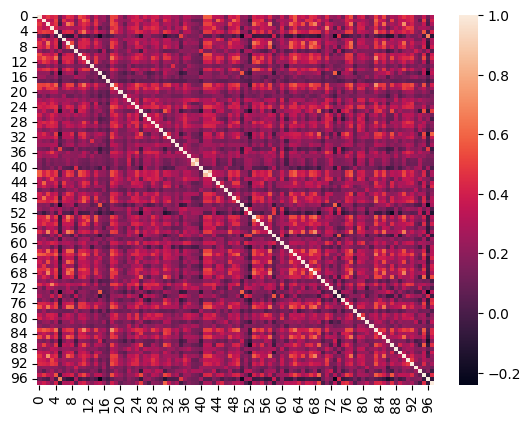

In [37]:
sns.heatmap(final_corr_mat)

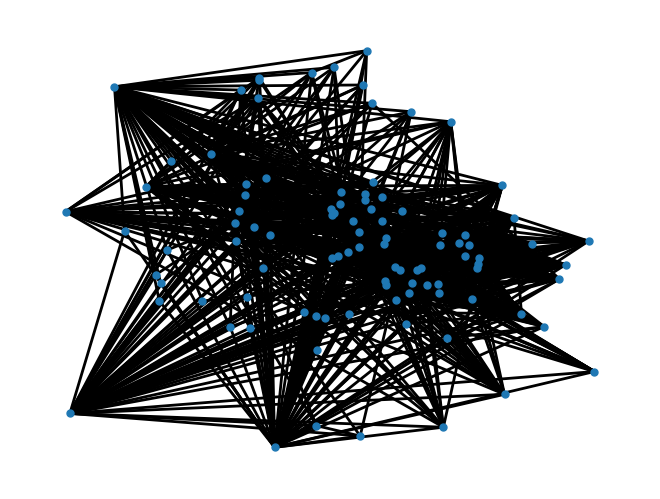

In [38]:
t1_multi = find_theta1(final_corr_mat)
w_multi = weight1(t1_multi,0.7, final_corr_mat)
G_multi = net(Symbols, w_multi)
pos = nx.spring_layout(G_multi)
nx.draw(G_multi,pos, with_labels=False, node_size = 25, width = 2)

In [39]:
#Checking connectedness
connected_nodes = set([i for i in G_multi.nodes if len(list(G_multi.neighbors(i)))>0])
len(connected_nodes) == len(Symbols)

True

### Random walk mechanism


In [40]:
import random

In [41]:
def trans_prob(w_mat, G):
    P = np.zeros(w_mat.shape)
    for i in range(len(Symbols)):
        for j in G.neighbors(i):
            P[i,j] = np.exp(w_mat[i,j])/np.sum([np.exp(w_mat[i,z]) for z in list(G.neighbors(i))])
    if np.all(np.sum(P,axis=1)==1):
        return P
    else:
        print('error')

In [42]:
#Random walk algorithm
# Let no. of q = 5
def random_walk(G, weight_mat, n):
    connected_nodes = set([i for i in G.nodes if len(list(G.neighbors(i)))>0])
    V = np.zeros(len(Symbols))
    P = np.zeros(weight_mat.shape)
    for i in range(len(Symbols)):
        for j in G.neighbors(i):
            P[i,j] = np.exp(weight_mat[i,j])/np.sum([np.exp(weight_mat[i,z]) for z in list(G.neighbors(i))])

    instance = random.choice(list(G.nodes))

    while n>0:
        next_node = random.choices(list(G.nodes),weights=[P[instance,i] for i in range(P.shape[1])])
        
        V[next_node] += 1
        instance = next_node
        n -= 1
    
    q = V.argsort()[::-1][:5]
    v_int = [V[i] for i in q]
    w = v_int/np.sum(v_int)
    return V,q,w

#### Random walk on Pearson network

In [43]:
# No. of iterations are set to be 10000
V_pearson, q_pearson, weight_pearson = random_walk(G_pearson, w_pearson,10000)

In [44]:
#Stocks in portfolio for pearson
stocks_pearson = [Symbols[i] for i in q_pearson]
stocks_pearson

['ATVI', 'KHC', 'XEL', 'AEP', 'GILD']

#### Random walk on Spearman network

In [45]:
V_spearman, q_spearman, weight_spearman = random_walk(G_spearman, w_spearman,10000)

In [46]:
#Stocks in portfolio for spearman
stocks_spearman = [Symbols[i] for i in q_spearman]
stocks_spearman

['XEL', 'AEP', 'KHC', 'GILD', 'EXC']

#### Random walk on Kendall Tau network

In [47]:
V_kt, q_kt, weight_kt = random_walk(G_kt, w_kt,10000)

In [48]:
#Stocks in portfolio for kt
stocks_kt = [Symbols[i] for i in q_kt]
stocks_kt

['AEP', 'GILD', 'XEL', 'KHC', 'EXC']

#### Random walk on Grey relational network

In [49]:
V_grey, q_grey, weight_grey = random_walk(G_grey, w_grey,10000)

In [50]:
#Stocks in portfolio for grey
stocks_grey = [Symbols[i] for i in q_grey]
stocks_grey

['TMUS', 'BIDU', 'CDW', 'SPLK', 'AMGN']

#### Random walk on NMI network

In [51]:
V_NMI, q_NMI, weight_NMI = random_walk(G_NMI, w_NMI,10000)

In [52]:
#Stocks in portfolio for NMI
stocks_NMI = [Symbols[i] for i in q_NMI]
stocks_NMI

['CPRT', 'AVGO', 'INTU', 'PEP', 'ASML']

#### Random walk on multi-layer network

In [53]:
V_multi, q_multi, weight_multi = random_walk(G_multi, w_multi,10000)

In [54]:
#Stocks in portfolio for multi-layer network
stocks_multi = [Symbols[i] for i in q_multi]
stocks_multi

['BKNG', 'XEL', 'KHC', 'AEP', 'REGN']

In [55]:
ret = (df - df.shift(1))/df.shift(1)
ret = ret.drop(0)
ret_mat = np.matrix(ret)

In [56]:
def sharpe_ratio(q,weight):
    ret_arr = []
    for i in range(ret_mat.shape[0]):
        sum = 0
        for j in range(len(q)):
            sum += weight[j]*ret_mat[i,q[j]]
        ret_arr.append(sum)
    return (252**0.5)*(np.mean(ret_arr)/np.std(ret_arr))


In [57]:
sr_pearson = sharpe_ratio(q_pearson, weight_pearson)
sr_pearson

0.023605292875841018

In [58]:
sr_spearman = sharpe_ratio(q_spearman, weight_spearman)
sr_spearman

0.8436443979344064

In [59]:
sr_kt = sharpe_ratio(q_kt, weight_kt)
sr_kt

0.8066606561111325

In [60]:
sr_grey = sharpe_ratio(q_grey, weight_grey)
sr_grey

-0.0031731893778531644

In [61]:
sr_NMI = sharpe_ratio(q_NMI, weight_NMI)
sr_NMI

0.9283158445309058

In [62]:
sr_multi = sharpe_ratio(q_multi, weight_multi)
sr_multi

1.011867318720421